# 1. Plot the time series data with rolling mean and rolling standard deviation and see if it is stationary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

# Logarithmic, reciprocal, and square root

In [2]:
df = pd.read_csv(r"C:\Users\trucn\Documents\repositories\ds-mod-2-0924-code-solutions\time-series-1\AirPassengers.csv")

In [3]:
pd.set_option("display.max_columns", 250)

In [4]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
# First set Month as DateTime type and as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)


In [6]:
df.sort_index

<bound method DataFrame.sort_index of             #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]>

In [7]:
df1 = df.copy() # Save a copy of the tidied data for future analyses

In [8]:
df['Rolling Mean'] = df.rolling(window = 12).mean()

In [9]:
df['Rolling Std'] = df['#Passengers'].rolling(window = 12).std()

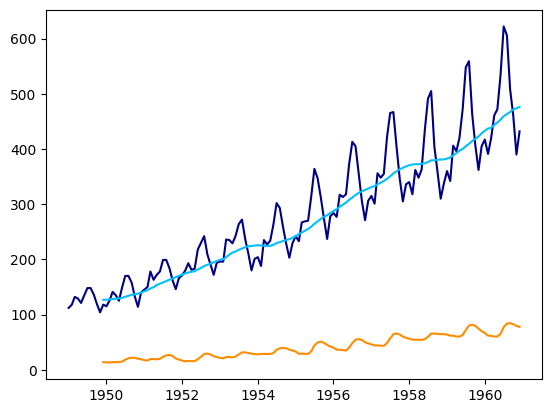

In [10]:
plt.plot(df['#Passengers'], color = 'navy')
plt.plot(df['Rolling Mean'], color = 'deepskyblue')
plt.plot(df['Rolling Std'], color = 'darkorange')

The data appears to be not stationary, particularly due to the increasing mean and variance.

# 2. Try different levels of differences, and plot the time series data with rolling mean and standard deviation. See if it is stationary.

## Level of difference, d = 1

In [11]:
#df['#Passengers1'] = df['#Passengers'].shift()
#df['Diff1'] = df['#Passengers'] - df['#Passengers1']

In [31]:
df['#Passengers_Diff1'] = df['#Passengers'].diff(1)

In [36]:
df['Rolling Mean Diff1'] = df['#Passengers_Diff1'].rolling(window = 12).mean()

In [38]:
df['Rolling Std Diff1'] = df['#Passengers_Diff1'].rolling(window = 12).std()

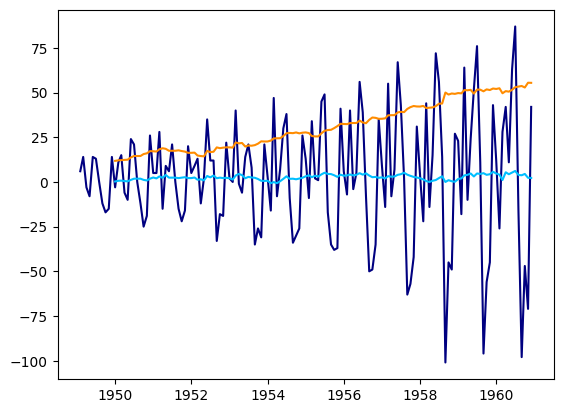

In [39]:
plt.plot(df['#Passengers_Diff1'], color = 'navy')
plt.plot(df['Rolling Mean Diff1'], color = 'deepskyblue')
plt.plot(df['Rolling Std Diff1'], color = 'darkorange')

At d = 1, the data is not stationary.

## Level of difference, d = 2

In [40]:
df['#Passengers_Diff2'] = df['#Passengers'].diff(2)
df['Rolling Mean Diff2'] = df['#Passengers_Diff2'].rolling(window = 12).mean()
df['Rolling Std Diff2'] = df['#Passengers_Diff2'].rolling(window = 12).std()

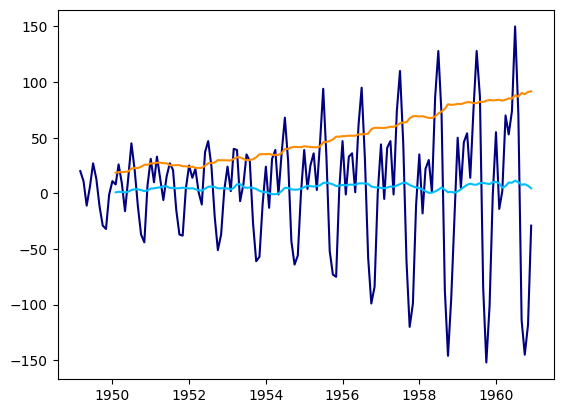

In [41]:
plt.plot(df['#Passengers_Diff2'], color = 'navy')
plt.plot(df['Rolling Mean Diff2'], color = 'deepskyblue')
plt.plot(df['Rolling Std Diff2'], color = 'darkorange')

In [ ]:
plt.plot(df['#Passengers_Diff1'], color = 'navy')
plt.plot(df['Rolling Mean Diff1'], color = 'deepskyblue')
plt.plot(df['Rolling Std Diff1'], color = 'darkorange')

At d = 2, data still looks non-stationary.

# 3. Try to transform the data, and make different levels of differences. See if it is stationary.

<Axes: >

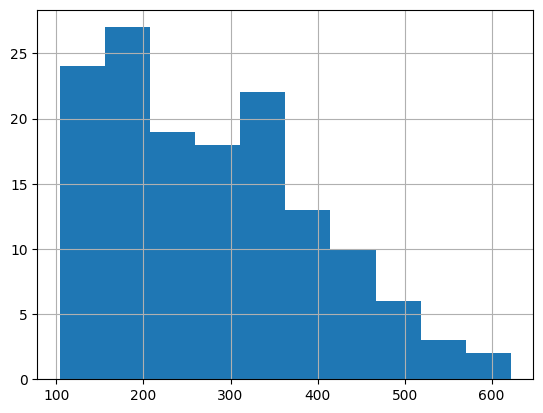

In [18]:
df1['#Passengers'].hist()

In [19]:
# Let's try taking the logarithm of #Passengers since it appears right-skewed

In [20]:
df1['#PassengersLog'] = np.log(df1['#Passengers'])

## Level of difference, d = 1

In [21]:
df1['#PassengersLog1'] = df1['#PassengersLog'].shift()

In [22]:
df1['DiffLog1'] = df1['#PassengersLog'] - df1['#PassengersLog1']

<Axes: xlabel='Month'>

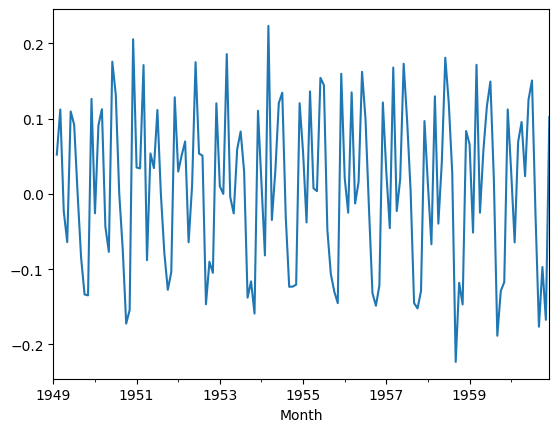

In [23]:
df1['DiffLog1'].plot()

## Level of difference, d = 2

In [24]:
df1['#PassengersLog2'] = df1['#PassengersLog1'].shift()

In [25]:
df1['DiffLog2'] = df1['#PassengersLog1'] - df1['#PassengersLog2']

<Axes: xlabel='Month'>

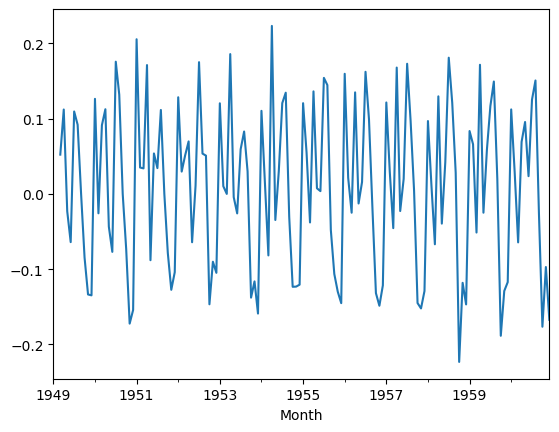

In [26]:
df1['DiffLog2'].plot()

# 4. Get the p-value from Augmented Dickey-Fuller test to make the data stationary.

In [27]:
adf_original_data = adfuller(df['#Passengers'].dropna())
adf_original_data 

# In this context, if we fail to reject the null hypothesis, we cannot conclude that our data is stationary.

(np.float64(0.8153688792060463),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [28]:
adf_original_data2 = adfuller(df['Diff1'].dropna())
adf_original_data2 

(np.float64(-2.8292668241699923),
 np.float64(0.054213290283826474),
 12,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(988.5069317854084))

For the original, untransformed data, we fail to reject the null hypothesis at the 1% and 5% significance levels, but we can do so otherwise at the 10% level.

In [29]:
adf_trans_data = adfuller(df1['#PassengersLog'].dropna())
adf_trans_data

(np.float64(-1.717017089106963),
 np.float64(0.4223667747703902),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-445.3990312497209))

In [30]:
adf_trans_data2 = adfuller(df1['DiffLoga1'].dropna())
adf_trans_data2

(np.float64(-2.717130598388136),
 np.float64(0.0711205481508582),
 14,
 128,
 {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 np.float64(-440.35846985568105))

For the transformed data, we fail to reject the null hypothesis at the 1% and 5% significance levels, but we can do so otherwise at the 10% level.